In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.metrics import classification_report

import wrangle
import explore
from model import model_df
pd.set_option('display.max_columns', None)

## Acquiring the Data

In [2]:
df = pd.read_csv('service_calls.csv')

## Preparing the Data

In [3]:
df = wrangle.clean_311(df)

In [4]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df)
north_df = train[(train['council_district'] == 9) | (train['council_district'] == 8)]
central_df = train[(train['council_district'] == 1) | (train['council_district'] == 5)]
east_df = train[(train['council_district'] == 10) | (train['council_district'] == 2)]

## Explore

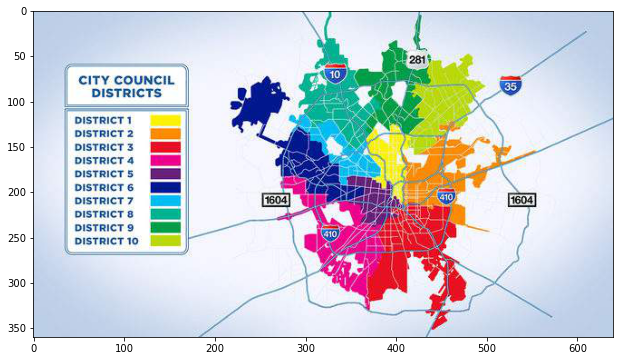

In [5]:
# A map for visualizing where each district lies.

plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

### Explore by Counts of Levels of Delay

Text(0.5, 1.0, 'Northern Levels of Delay')

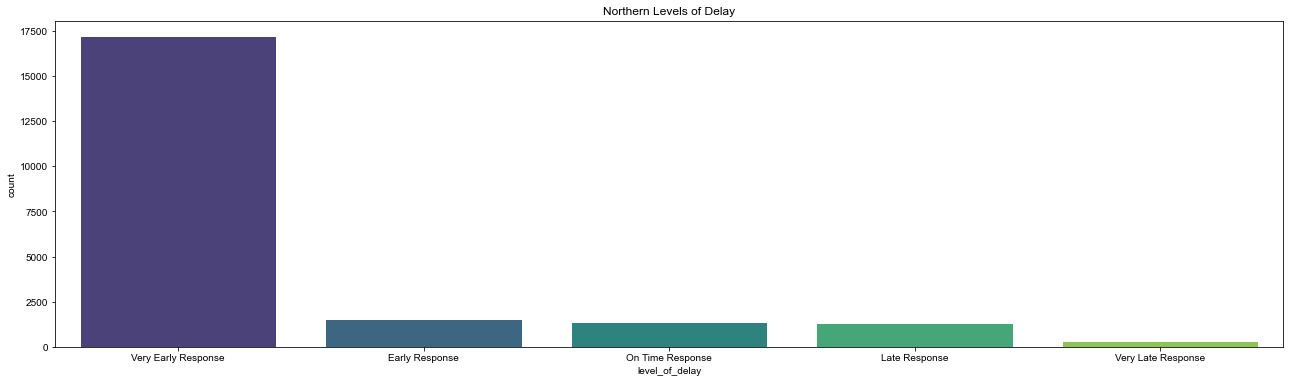

In [6]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = north_df, x = 'level_of_delay', palette = "viridis").set_title('Northern Levels of Delay')

Text(0.5, 1.0, 'Downtown Levels of Delay')

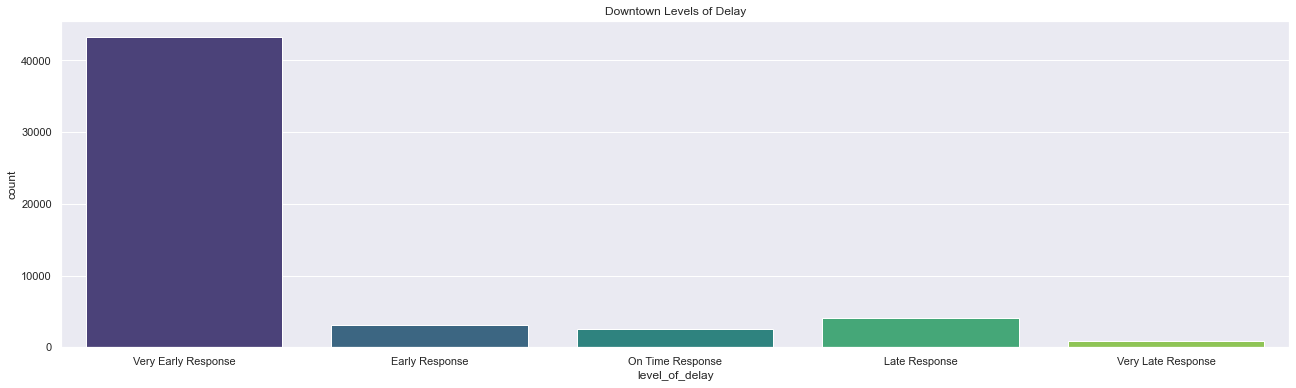

In [7]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = central_df, x = 'level_of_delay', palette = "viridis").set_title('Downtown Levels of Delay')

Text(0.5, 1.0, 'Easternern Levels of Delay')

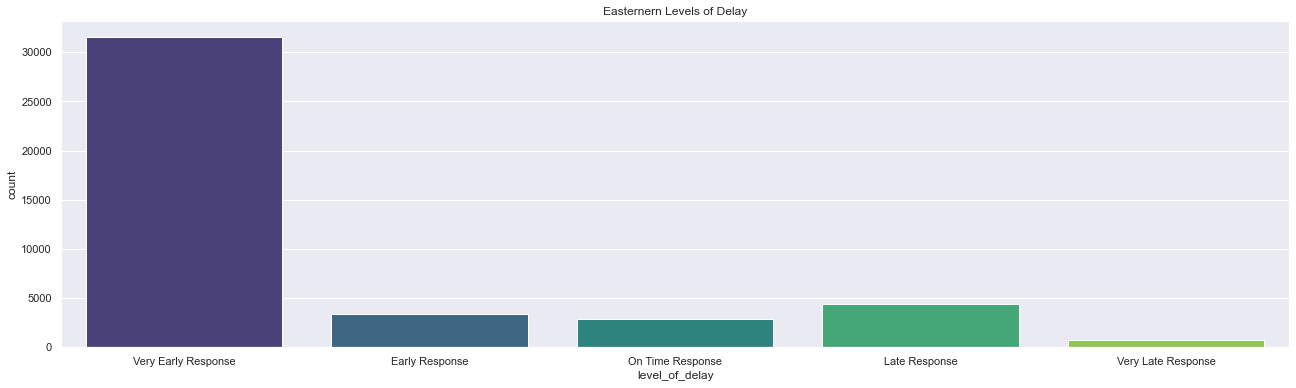

In [8]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = east_df, x = 'level_of_delay', palette = "viridis").set_title('Easternern Levels of Delay')

### Explore by Average Response Time by Department

Text(0.5, 1.0, 'North Average Days Before or After Due Date by Department')

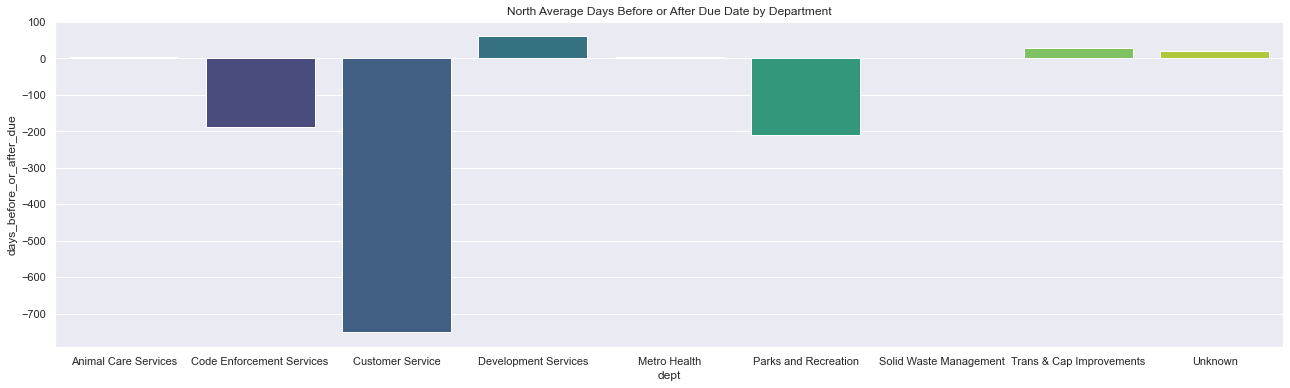

In [9]:


plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('dept').mean().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('North Average Days Before or After Due Date by Department')

Text(0.5, 1.0, 'Downtown Average Days Before or After Due Date by Department')

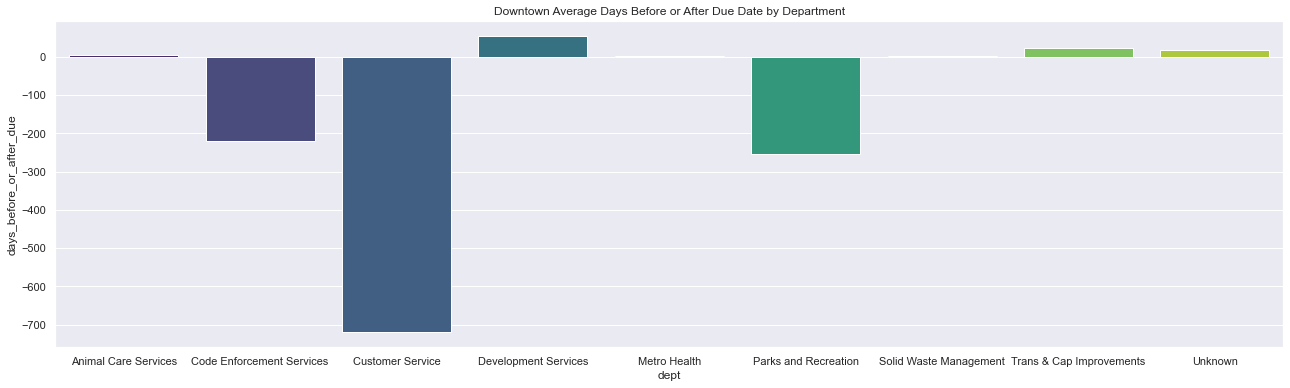

In [10]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('dept').mean().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('Downtown Average Days Before or After Due Date by Department')

Text(0.5, 1.0, 'East Average Days Before or After Due Date by Department')

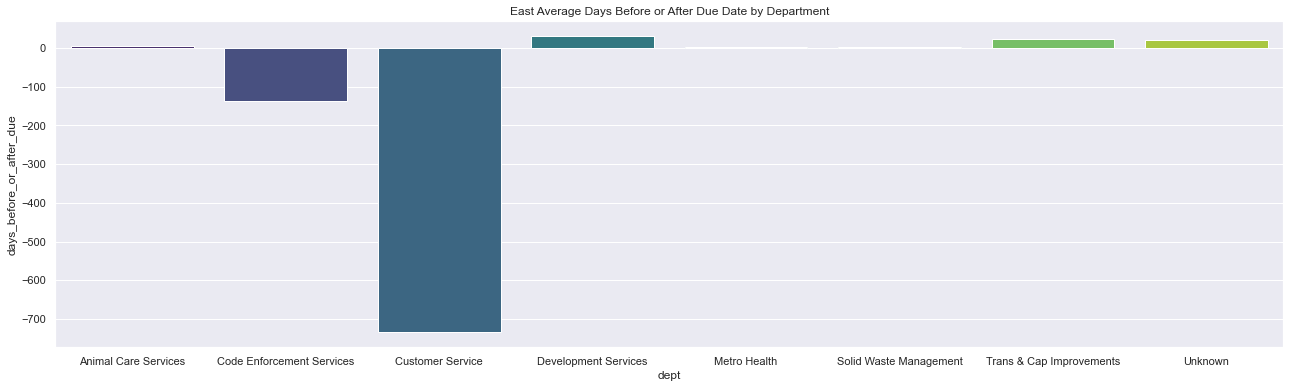

In [11]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('dept').mean().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('East Average Days Before or After Due Date by Department')

### Explore by Median Response Time by Department

Text(0.5, 1.0, 'North Median Days Before or After Due Date by Department')

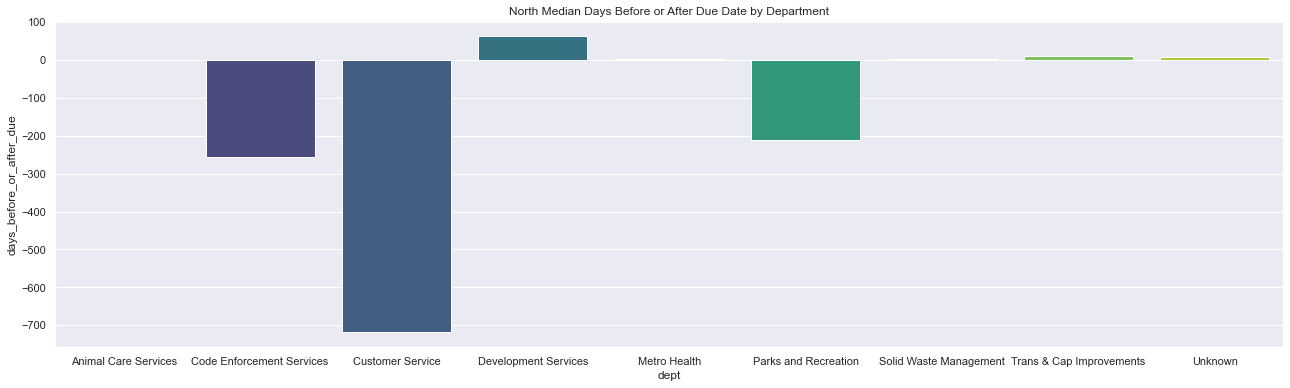

In [12]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('dept').median().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('North Median Days Before or After Due Date by Department')

Text(0.5, 1.0, 'Downtown Median Days Before or After Due Date by Department')

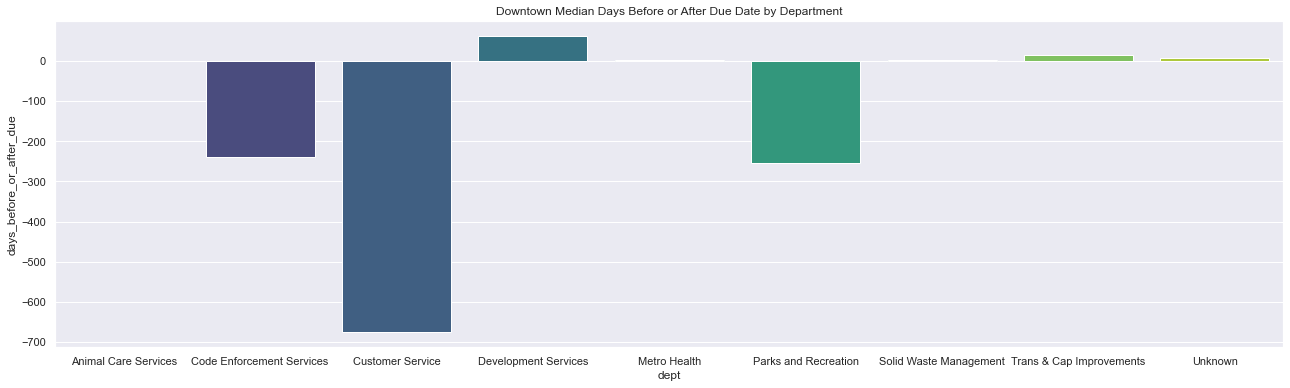

In [13]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('dept').median().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('Downtown Median Days Before or After Due Date by Department')

Text(0.5, 1.0, 'East Median Days Before or After Due Date by Department')

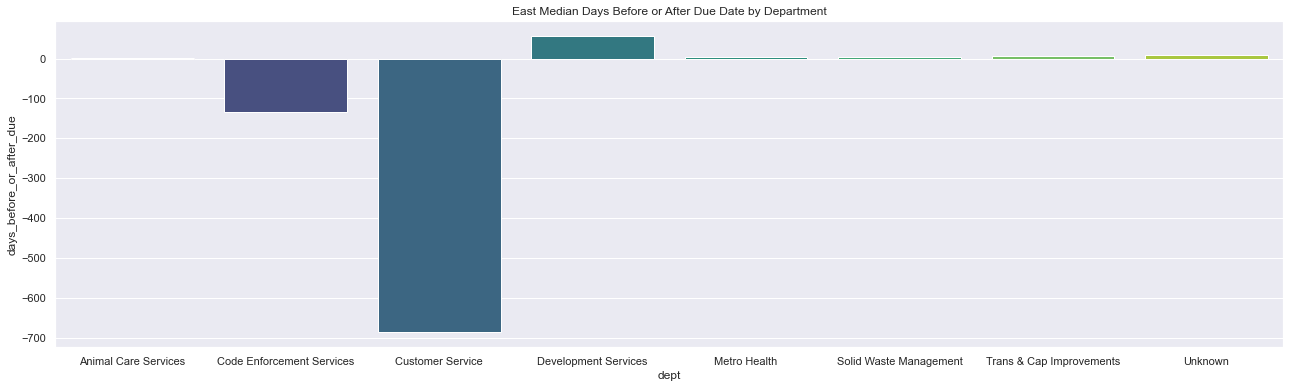

In [14]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('dept').median().reset_index(), x = 'dept', y = 'days_before_or_after_due', palette = "viridis").set_title('East Median Days Before or After Due Date by Department')

### Explore by Median Response Time by Reason for Call

Text(0.5, 1.0, 'North Median Days Before or After Due Date by Call Reason')

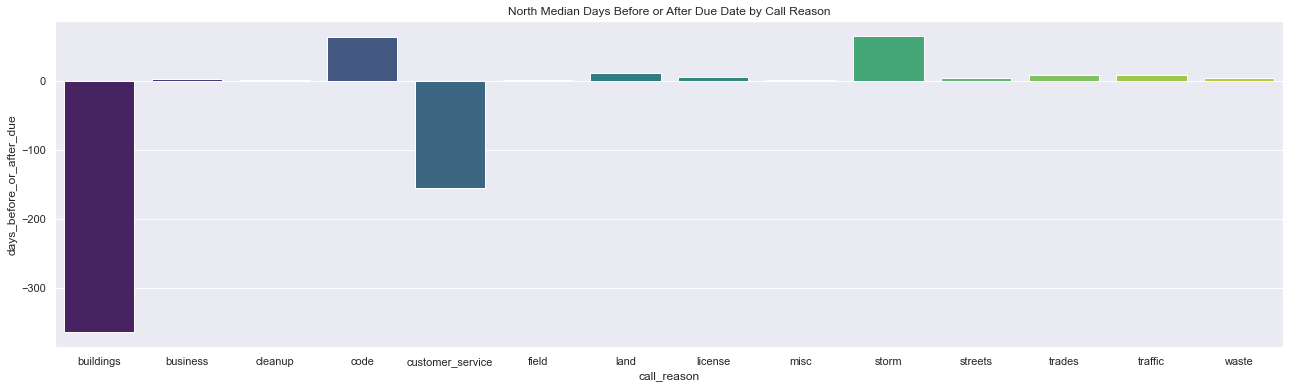

In [17]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('call_reason').median().reset_index(), x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('North Median Days Before or After Due Date by Call Reason')

Text(0.5, 1.0, 'Downtown Median Days Before or After Due Date by Call Reason')

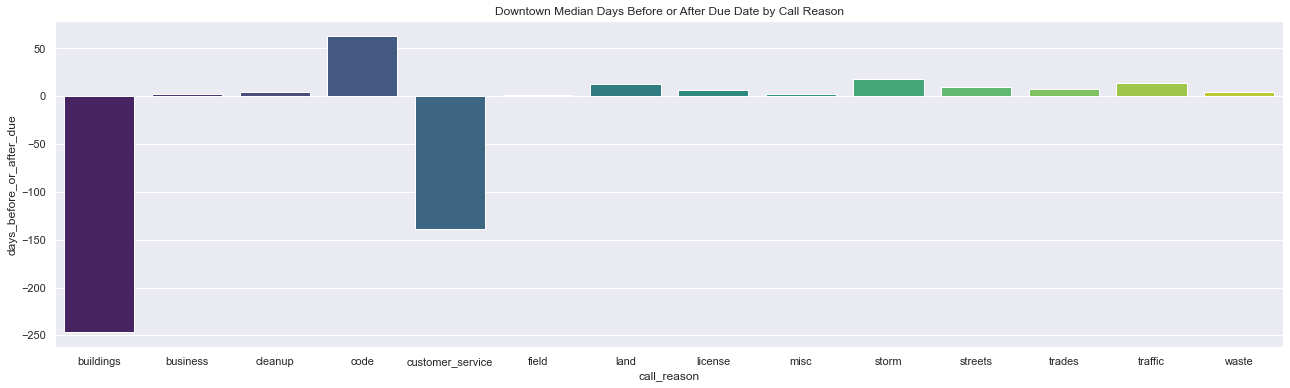

In [18]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = central_df.groupby('call_reason').median().reset_index(), x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('Downtown Median Days Before or After Due Date by Call Reason')

Text(0.5, 1.0, 'East Median Days Before or After Due Date by Call Reason')

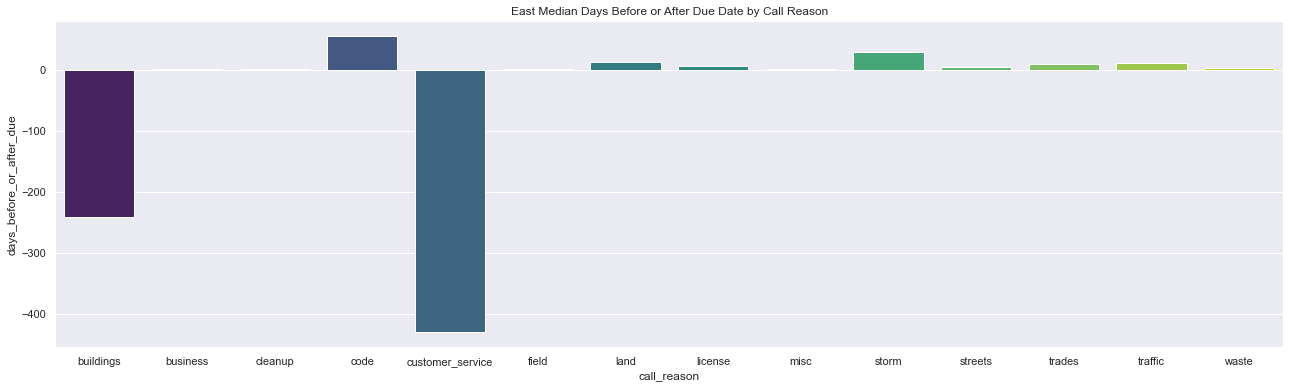

In [19]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = east_df.groupby('call_reason').median().reset_index(), x = 'call_reason', y = 'days_before_or_after_due', palette = "viridis").set_title('East Median Days Before or After Due Date by Call Reason')

### Counts of Calls by Department for each Region

In [ ]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = north_df.groupby('call_reason').count().reset_index(), x = 'call_reason', y = 'due_date', palette = "viridis").set_title('North Median Days Before or After Due Date by Call Reason')

In [20]:
north_df.groupby('call_reason').count().reset_index()

,call_reason,open_date,due_date,closed_date,is_late,dept,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
0,buildings,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
1,business,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
2,cleanup,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
3,code,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920,3920
4,customer_service,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
5,field,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672
6,land,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
7,license,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
8,misc,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153
9,storm,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
